In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv(r'C:\Users\Admin\Desktop\AI\Data Analysis\heart disease project\2022\heart_2022_with_nans.csv')
data.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [5]:
data.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [7]:
data.duplicated().sum()

157

In [8]:
missing_values=data.isnull().sum() #checking for missing values
missing_values

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [9]:
missing_precentage=missing_values/len(data)*100
missing_df=pd.DataFrame({'missing_values':missing_values,'missing_precentage':missing_precentage})
missing_df

,missing_values,missing_precentage
State,0,0.000000
Sex,0,0.000000
GeneralHealth,1198,0.269134
PhysicalHealthDays,10927,2.454777
MentalHealthDays,9067,2.036924
LastCheckupTime,8308,1.866413
PhysicalActivities,1093,0.245545
SleepHours,5453,1.225030
RemovedTeeth,11360,2.552052
HadHeartAttack,3065,0.688560


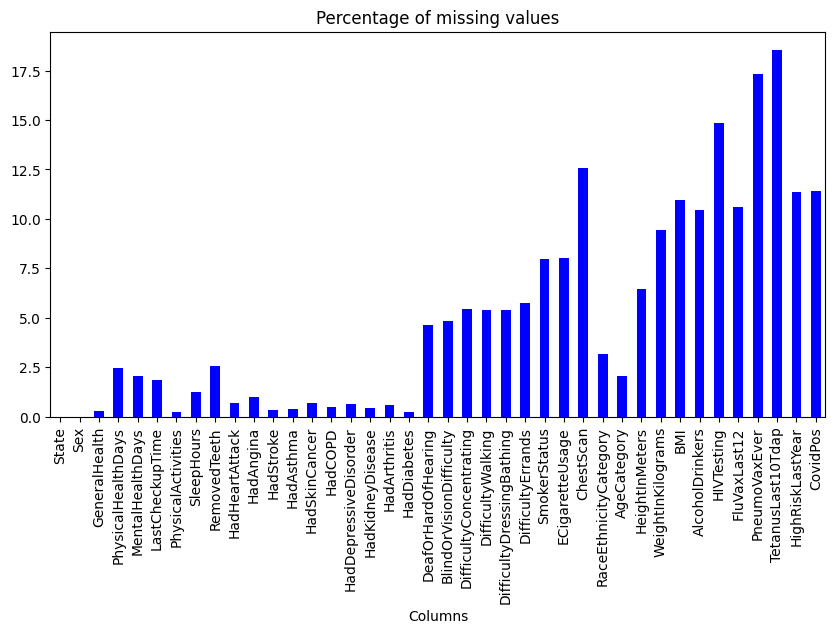

In [10]:
plt.figure(figsize=(10,5))
missing_precentage.plot(kind='bar',color='blue')
plt.xlabel('Columns')
plt.title('Percentage of missing values')
plt.show()

In [11]:
data.GeneralHealth.value_counts(normalize=True)*100

GeneralHealth
Very good    33.438304
Good         32.346700
Excellent    16.191146
Fair         13.577018
Poor          4.446832
Name: proportion, dtype: float64

In [12]:
data.GeneralHealth.fillna(data.GeneralHealth.mode()[0],inplace=True)

In [13]:
data.PhysicalHealthDays.value_counts(normalize=True)*100

PhysicalHealthDays
0.0     61.680312
30.0     7.618982
2.0      5.816607
1.0      3.972778
3.0      3.672919
5.0      3.527136
10.0     2.438710
7.0      2.152900
15.0     2.023698
4.0      1.948849
20.0     1.248489
14.0     1.158209
6.0      0.584517
25.0     0.502297
8.0      0.405569
12.0     0.255870
21.0     0.239058
28.0     0.172960
9.0      0.094656
29.0     0.084062
18.0     0.062413
16.0     0.058728
27.0     0.043298
17.0     0.042607
13.0     0.037310
11.0     0.037079
22.0     0.032243
24.0     0.028788
26.0     0.025103
23.0     0.022800
19.0     0.011055
Name: proportion, dtype: float64

In [14]:
data.PhysicalHealthDays.mean() - data.PhysicalHealthDays.std() * 3    #outliers

-21.71881738517407

In [15]:
data.PhysicalHealthDays.mean() + data.PhysicalHealthDays.std() * 3   #outliers

30.4146546049205

<Axes: ylabel='PhysicalHealthDays'>

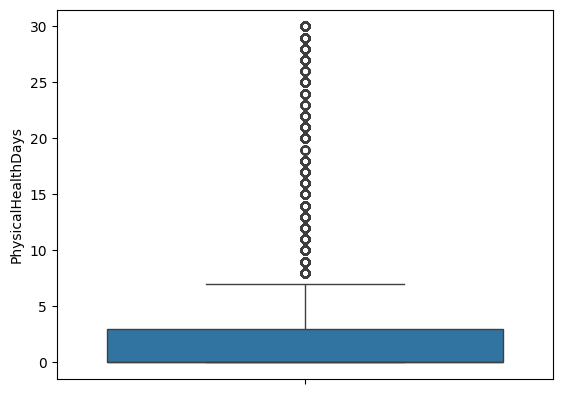

In [16]:
sns.boxplot(data.PhysicalHealthDays)

In [17]:
data.PhysicalHealthDays.fillna(data.PhysicalHealthDays.median(),inplace=True)

In [18]:
data.MentalHealthDays.value_counts(normalize=True)*100

MentalHealthDays
0.0     60.823272
30.0     6.189444
2.0      5.454462
5.0      4.575235
10.0     3.534794
3.0      3.518971
15.0     3.329549
1.0      3.304324
20.0     2.098311
4.0      1.821517
7.0      1.798814
25.0     0.705858
14.0     0.658388
6.0      0.528591
8.0      0.401087
12.0     0.288718
28.0     0.208684
21.0     0.125899
29.0     0.115120
9.0      0.073842
18.0     0.073154
16.0     0.064211
17.0     0.055955
27.0     0.055267
22.0     0.044259
13.0     0.038756
24.0     0.028436
11.0     0.027748
26.0     0.024308
23.0     0.022244
19.0     0.010778
Name: proportion, dtype: float64

In [19]:
data.MentalHealthDays.mean() - data.MentalHealthDays.std() * 3    #outliers

-20.77977458437194

In [20]:
data.MentalHealthDays.mean() + data.MentalHealthDays.std() * 3    #outliers

29.54507333570488

<Axes: ylabel='MentalHealthDays'>

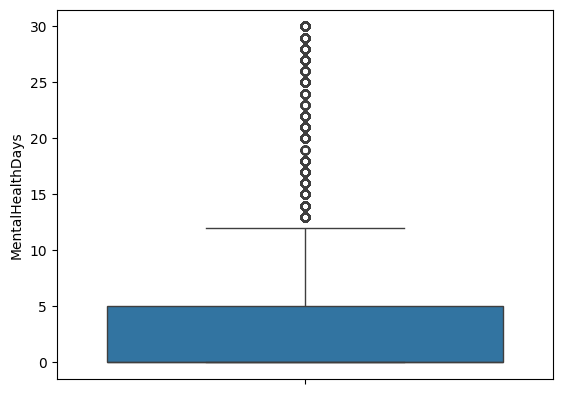

In [21]:
sns.boxplot(data.MentalHealthDays)

In [22]:
data.MentalHealthDays.fillna(data.MentalHealthDays.median(),inplace=True)

In [23]:
data.LastCheckupTime.value_counts(normalize=True)*100

LastCheckupTime
Within past year (anytime less than 12 months ago)         80.339908
Within past 2 years (1 year but less than 2 years ago)      9.596313
Within past 5 years (2 years but less than 5 years ago)     5.696116
5 or more years ago                                         4.367663
Name: proportion, dtype: float64

In [24]:
data.LastCheckupTime.fillna(data.LastCheckupTime.mode()[0],inplace=True)

In [25]:
data.PhysicalActivities.value_counts(normalize=True)*100

PhysicalActivities
Yes    76.020124
No     23.979876
Name: proportion, dtype: float64

In [26]:
data.groupby('AgeCategory')['PhysicalActivities'].value_counts(normalize=True)


AgeCategory      PhysicalActivities
Age 18 to 24     Yes                   0.837555
                 No                    0.162445
Age 25 to 29     Yes                   0.830525
                 No                    0.169475
Age 30 to 34     Yes                   0.819579
                 No                    0.180421
Age 35 to 39     Yes                   0.820081
                 No                    0.179919
Age 40 to 44     Yes                   0.802803
                 No                    0.197197
Age 45 to 49     Yes                   0.784997
                 No                    0.215003
Age 50 to 54     Yes                   0.760853
                 No                    0.239147
Age 55 to 59     Yes                   0.746373
                 No                    0.253627
Age 60 to 64     Yes                   0.743685
                 No                    0.256315
Age 65 to 69     Yes                   0.752527
                 No                    0.247473
Age 

In [27]:
data.PhysicalActivities.fillna(data.PhysicalActivities.mode()[0],inplace=True)

In [28]:
data.SleepHours.value_counts(normalize=True)*100

SleepHours
7.0     30.232738
8.0     28.530360
6.0     21.806818
5.0      6.850907
9.0      4.823974
4.0      2.827745
10.0     2.378781
3.0      0.741450
12.0     0.683226
2.0      0.352302
1.0      0.262464
11.0     0.156023
16.0     0.074827
15.0     0.072098
14.0     0.067094
18.0     0.038210
13.0     0.037527
20.0     0.032524
24.0     0.011827
17.0     0.006141
22.0     0.004321
23.0     0.004094
19.0     0.003639
21.0     0.000910
Name: proportion, dtype: float64

<Axes: ylabel='SleepHours'>

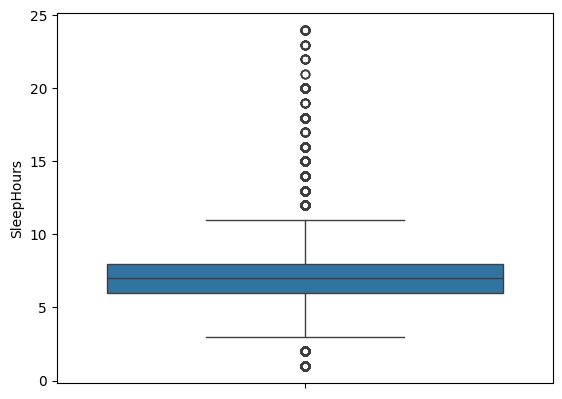

In [29]:
sns.boxplot(data.SleepHours)

In [30]:
data.SleepHours.fillna(data.SleepHours.median(), inplace=True)

In [31]:
data.RemovedTeeth.value_counts(normalize=True)*100

RemovedTeeth
None of them              53.819749
1 to 5                    29.806903
6 or more, but not all    10.505519
All                        5.867829
Name: proportion, dtype: float64

In [32]:
data.RemovedTeeth.fillna(data.RemovedTeeth.mode()[0],inplace=True)  

In [33]:
columns_to_fill=['HadHeartAttack','HadAngina','HadStroke', 'HadAsthma',
    'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder',
    'HadKidneyDisease', 'HadArthritis', 'HadDiabetes']
for column in columns_to_fill:
    data[column].fillna(data[column].mode()[0],inplace=True)

In [34]:
disability_columns = [
    'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
    'DifficultyConcentrating', 'DifficultyWalking',
    'DifficultyDressingBathing', 'DifficultyErrands'
]

for col in disability_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)


In [69]:
data.isnull().sum()

State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder            0
HadKidneyDisease                 0
HadArthritis                     0
HadDiabetes                      0
DeafOrHardOfHearing              0
BlindOrVisionDifficulty          0
DifficultyConcentrating          0
DifficultyWalking                0
DifficultyDressingBathing        0
DifficultyErrands                0
SmokerStatus                     0
ECigaretteUsage                  0
ChestScan                    56046
RaceEthnicityCategor

In [36]:
data.SmokerStatus.value_counts(normalize=True) * 100

SmokerStatus
Never smoked                             60.037347
Former smoker                            27.772109
Current smoker - now smokes every day     8.788293
Current smoker - now smokes some days     3.402251
Name: proportion, dtype: float64

In [37]:
data.SmokerStatus.fillna(data.SmokerStatus.mode()[0], inplace=True)

In [38]:
data.ECigaretteUsage.value_counts(normalize=True) * 100

ECigaretteUsage
Never used e-cigarettes in my entire life    76.192756
Not at all (right now)                       18.406143
Use them some days                            2.865642
Use them every day                            2.535460
Name: proportion, dtype: float64

In [39]:
data.ECigaretteUsage.fillna(data.ECigaretteUsage.mode()[0], inplace=True)

In [66]:
data.AlcoholDrinkers.value_counts(normalize=True) * 100

AlcoholDrinkers
Yes    52.913503
No     47.086497
Name: proportion, dtype: float64

In [68]:
data.AlcoholDrinkers.fillna(data.AlcoholDrinkers.mode()[0], inplace=True)

In [70]:
data.HIVTesting.value_counts(normalize=True) * 100

HIVTesting
No     65.940819
Yes    34.059181
Name: proportion, dtype: float64

In [71]:
data.HIVTesting.fillna(data.HIVTesting.mode()[0], inplace=True)

<Axes: xlabel='HIVTesting'>

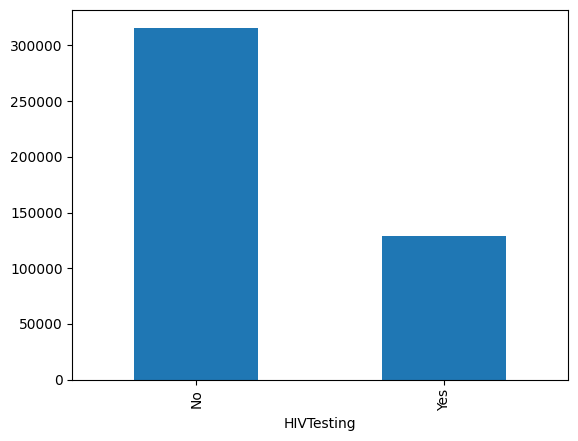

In [73]:
data.HIVTesting.value_counts().plot(kind='bar')

In [75]:
data.FluVaxLast12.value_counts(normalize=True) * 100

FluVaxLast12
Yes    52.575431
No     47.424569
Name: proportion, dtype: float64

<Axes: xlabel='FluVaxLast12'>

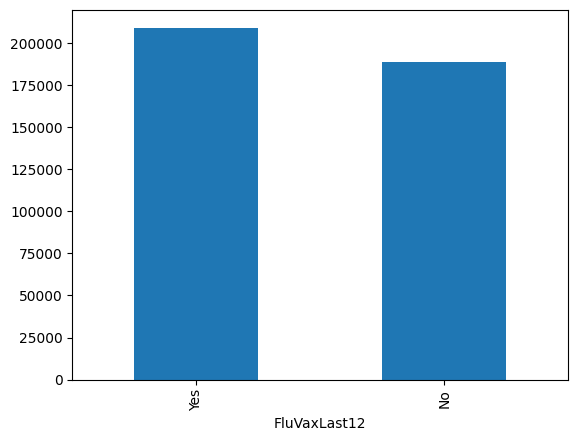

In [76]:
data.FluVaxLast12.value_counts().plot(kind='bar')